**OASIS INFOBYTE**

**NAME:** **POOJA SHARMA**

**TASK 3:** **EMAIL SPAM DETECTION**

**BATCH:** **OCTOBER PHASE 2 OIBSIP**

**DOMAIN:** **DATA SCIENCE**

**TASK:** **use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started!**

**IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**LOADING DATASET**

In [ ]:
from google.colab import files
upload = files.upload()

Saving spam.csv to spam.csv


In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**#getting info about the dataset**

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


**CHECKING NULL VALUES**





In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

as we can see there are so many null or NAN values in the dataset

**cleaning and evaluating the data for these missing values**

In [ ]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#lets check once again for null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

**our data is cleaned now.**

In [ ]:
#Let's rename our dataset for simplicity and for easy understanding
df = df.rename(columns = {'v1': 'Target', 'v2': 'Email'})
df

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**VISUALISATION OF DATA**

In [ ]:
Target=df["Target"].value_counts()
Target

ham     4825
spam     747
Name: Target, dtype: int64

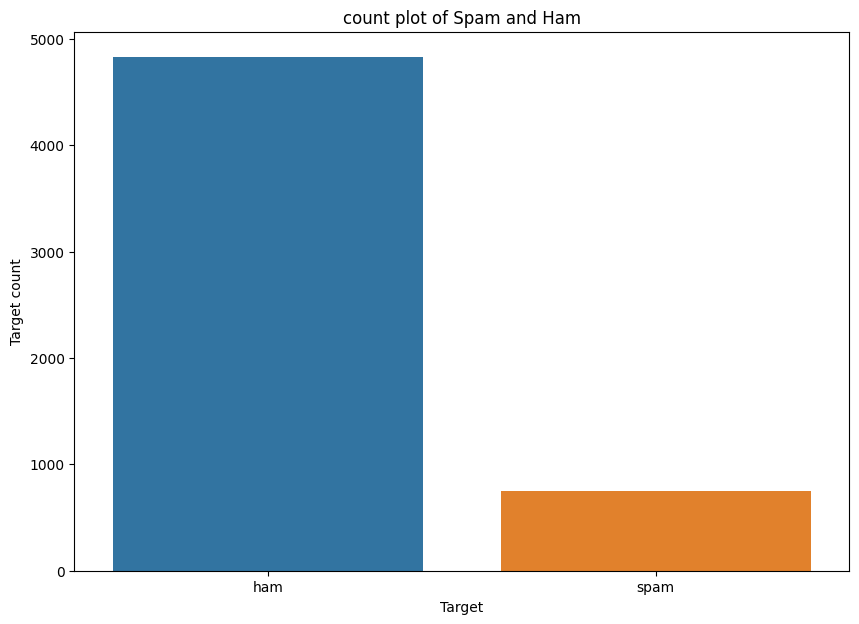

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x="Target", data=df)
plt.title("count plot of Spam and Ham")
plt.ylabel("Target count")
plt.show()

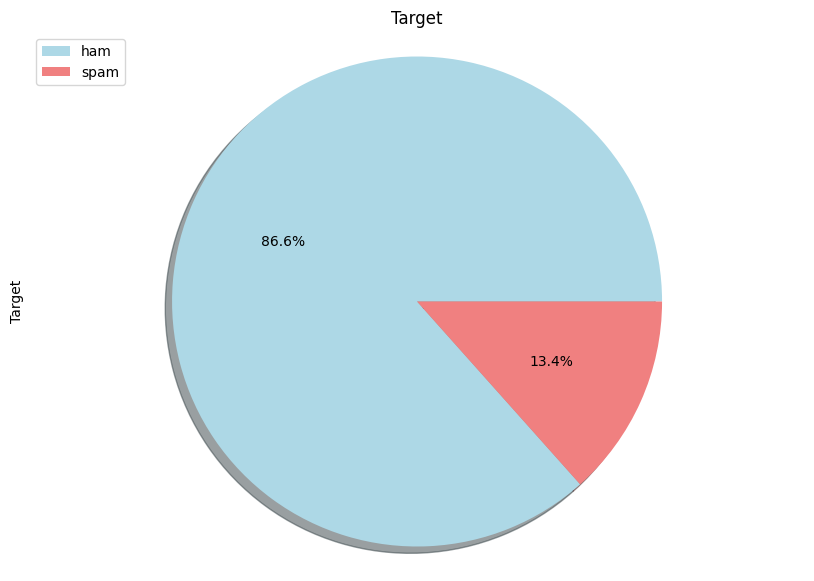

In [ ]:
Target.plot(kind="pie", figsize=(10,7), autopct="%1.1f%%", shadow=True, labels=None, colors=["lightblue", "Lightcoral"])
plt.title("Target")
plt.legend(labels=Target.index, loc="upper left")
plt.axis("equal")
plt.show()

**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])
df.head()

,Target,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [85]:
from sklearn.model_selection import train_test_split
x = df['Email']
y= df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(4457,)
(1115,)


**FEATURE SCALING**

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_vector = cv.fit_transform(x_train.values)
x_train_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [87]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

**TRAINING**

**Logistic Regression**

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_cv, y_train)

LogisticRegression()

**PREDICTION**

In [89]:
y_pred_lr = model.predict(x_test_cv)

**MODEL EVALUATION**

In [90]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_pred_lr))

Accuracy score:  0.9766816143497757


**K-Nearest neighbors (KNN)**

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_cv, y_train)

KNeighborsClassifier()

In [95]:
y_pred_knn = knn.predict(x_test_cv)

In [96]:
print("Accuracy score: ", accuracy_score(y_test, y_pred_knn))

Accuracy score:  0.9085201793721973


**Random Forest Classifier**

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_cv, y_train)

RandomForestClassifier()

In [101]:
y_pred_rf = rf.predict(x_test_cv)

In [102]:
print("Accuracy score: ", accuracy_score(y_test, y_pred_rf))

Accuracy score:  0.967713004484305


**CONCLUSION :**  Hence, out of 3 algorithms, Logistic Regression gives highest accuracy of 97.66%